<a href="https://colab.research.google.com/github/omarcos0708/House-Price-Regression/blob/main/House_Price_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SETUP

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score,train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

!pip install featurewiz -q
!pip install featurewiz --upgrade --quiet
from featurewiz import featurewiz as FW

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.3/110.3 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 4.9 MB/s eta 0:00:00
Imported 0.2.04 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_eng

In [8]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

#ESTATÍSTICA DESCRITIVA

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Regression problem ####
    Loaded train data. Shape = (1460, 81)
#### Single_Label Regression problem ####
loading the entire test dataframe - there is no nrows limit applicable #########
    Loaded test data. Shape = (1459, 80)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E

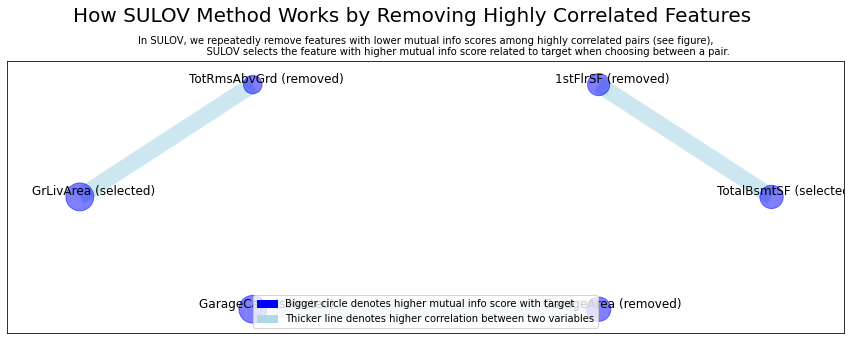

Time taken for SULOV method = 1 seconds
    Adding 40 categorical variables to reduced numeric variables  of 31
Finally 71 vars selected after SULOV
Converting all features to numeric before sending to XGBoost...
    there were no mixed data types or object columns that errored. Data is all numeric...
Shape of train data after adding missing values flags = (1460, 75)
    Shape of test data after adding missing values flags  = (1459, 74)
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 74 
    Taking top 11 features per iteration...
    XGBoost version using 0.90 as tree method: gpu_hist
Number of booster rounds = 100
        using 74 variables...
Regular XGBoost is crashing due to: [01:07:52] /

In [16]:
train_select, test_select = FW(train, "SalePrice", corr_limit=0.7, test_data=test, category_encoders="", verbose=2)

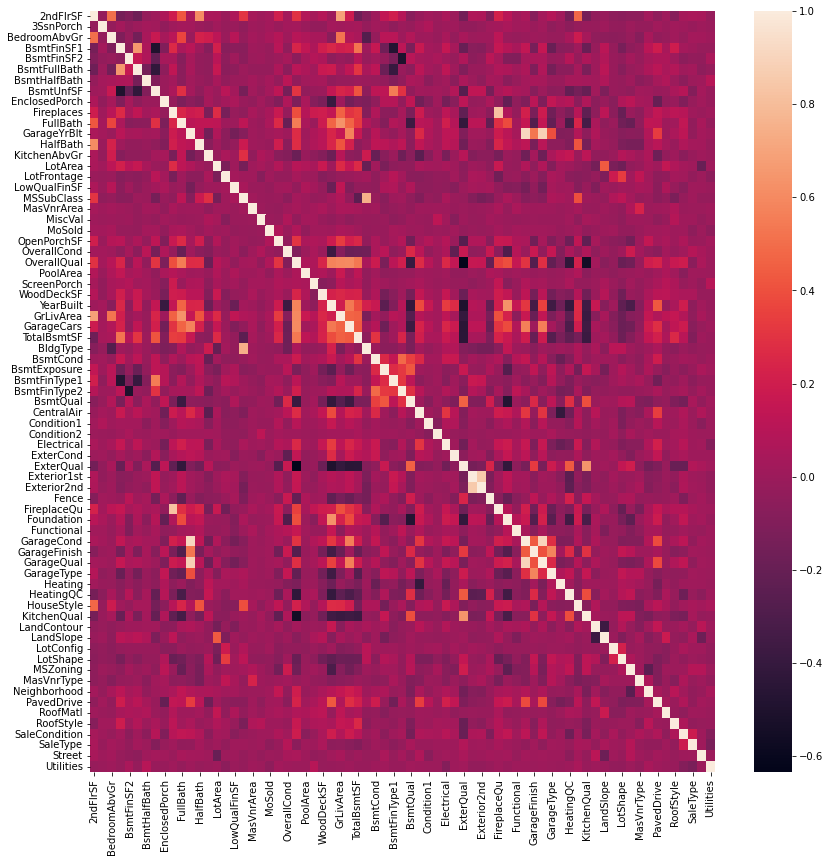

In [18]:
plt.figure(figsize=(14, 14))
sns.heatmap(train_select.corr())

O CODIGO ALEM DE SELECIONAR AS MELHORES CORRELAÇÕES ELIMINOU CORRELAÇÕES MUITO ALTAS EVITANDO POSSIVEL OVER FITTING

##DISTOBRUIÇÂO DOS DADOS

ANÁLISANDO DISTRIBUIÇÂO DOS DADOS **TARGET**

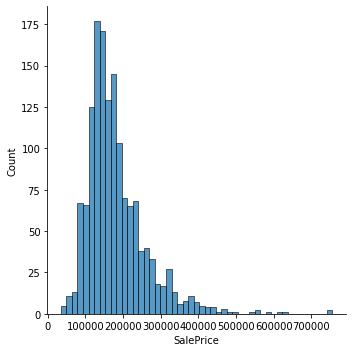

In [19]:
sns.displot(train['SalePrice']);

In [20]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

FICA CLARA A NECESSIDADE DE NORMALIZAR A DISTRUIBUIÇÃO


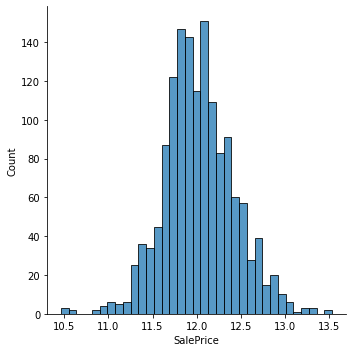

In [21]:
sns.displot(np.log(train["SalePrice"]));

O CÓDIGO FUNCIONOU BEM E REALIZOU BOA NORMALIZAÇÃO :)

entaão vamos prosseguir com a normalização


In [24]:
y = np.log(train["SalePrice"])

#DATA MODELING

In [35]:
XGB_model = XGBRegressor(random_state=100)

XGB_scores = cross_val_score(XGB_model, train_select, y, cv=5, scoring="neg_root_mean_squared_error")

XGB_mean_score = XGB_scores.mean()
XGB_std_score = XGB_scores.std()
print()
print(f"RMSE = {XGB_scores}")
print(f"Mean RMSE = {XGB_mean_score:.2f}")
print(f"StDev RMSE = {XGB_std_score:.2f}")

[01:19:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:19:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:19:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:19:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:19:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

RMSE = [-0.12054543 -0.14126454 -0.1325968  -0.13208163 -0.13379406]
Mean RMSE = -0.13
StDev RMSE = 0.01


##ANÁLISANDO OVERFITTING

[01:20:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


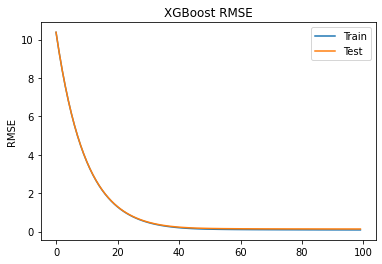

In [37]:
XGB_model = XGBRegressor(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(train_select, y, test_size=0.20, random_state=100)

eval_set = [(X_train, y_train), (X_test, y_test)]
XGB_model.fit(X_train, y_train, eval_metric="rmse", eval_set=eval_set, verbose=False)
results = XGB_model.evals_result()

epochs = len(results['validation_0']['rmse'])

x_axis = range(0, epochs)
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()

plt.ylabel('RMSE')
plt.title('XGBoost RMSE')
plt.show()

In [38]:
eval_set = [(X_test, y_test)]
XGB_model.fit(X_train, y_train, early_stopping_rounds=8, eval_metric="rmse", eval_set=eval_set, verbose=True)

[01:20:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:10.3836
Will train until validation_0-rmse hasn't improved in 8 rounds.
[1]	validation_0-rmse:9.34819
[2]	validation_0-rmse:8.41644
[3]	validation_0-rmse:7.57795
[4]	validation_0-rmse:6.8233
[5]	validation_0-rmse:6.14413
[6]	validation_0-rmse:5.53436
[7]	validation_0-rmse:4.98447
[8]	validation_0-rmse:4.49099
[9]	validation_0-rmse:4.04657
[10]	validation_0-rmse:3.6443
[11]	validation_0-rmse:3.28366
[12]	validation_0-rmse:2.95973
[13]	validation_0-rmse:2.6689
[14]	validation_0-rmse:2.40498
[15]	validation_0-rmse:2.16894
[16]	validation_0-rmse:1.95584
[17]	validation_0-rmse:1.76466
[18]	validation_0-rmse:1.59232
[19]	validation_0-rmse:1.43707
[20]	validation_0-rmse:1.29797
[21]	validation_0-rmse:1.17265
[22]	validation_0-rmse:1.05898
[23]	validation_0-rmse:0.957886
[24]	validation_0-rmse:0.867788
[25]	validation_0-rmse:0.786475
[26]	validati

XGBRegressor()

#OUTPUT

In [47]:
test_pred = np.exp(XGB_model.predict(test_select))
pred = pd.concat([test["Id"],pd.Series(test_pred,name='SalePrice')],axis=1)
pred['Id'] = pred['Id'].astype('int')
pred.to_csv('/content/submission.csv', index=False)

In [49]:
predição = pd.read_csv('/content/submission.csv')

In [52]:
predição

,Id,SalePrice
0,1461,122961.95
1,1462,159045.08
2,1463,179513.27
3,1464,182546.19
4,1465,196555.42
...,...,...
1454,2915,88520.07
1455,2916,86958.32
1456,2917,161801.47
1457,2918,122888.22
